# Second Kaggle HW

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("train.csv").drop(columns=["id"])
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aakash,Male,47,Agra,Working Professional,Teacher,NaN,1.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,B.Arch,Yes,11,5,Yes,0
1,Asha,Female,25,Chennai,Student,NaN,3.0,NaN,6.59,1.0,NaN,7-8 hours,Healthy,BSc,No,9,3,No,0
2,Samar,Male,56,Indore,Working Professional,Data Scientist,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,B.Tech,No,2,4,Yes,0
3,Chhavi,Female,24,Kalyan,Student,NaN,2.0,NaN,5.77,2.0,NaN,5-6 hours,Moderate,MBBS,Yes,5,3,No,1
4,Anand,Male,55,Kanpur,Working Professional,Researcher,NaN,1.0,NaN,NaN,2.0,7-8 hours,Unhealthy,BSc,Yes,4,4,No,0


In [34]:
num_df = df.select_dtypes(include=["number"])
cat_df = df.select_dtypes(include=["object", "category"])

In [35]:
num_df.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,47,NaN,1.0,NaN,NaN,5.0,11,5,0
1,25,3.0,NaN,6.59,1.0,NaN,9,3,0
2,56,NaN,3.0,NaN,NaN,2.0,2,4,0
3,24,2.0,NaN,5.77,2.0,NaN,5,3,1
4,55,NaN,1.0,NaN,NaN,2.0,4,4,0


In [36]:
cat_df.head()

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Aakash,Male,Agra,Working Professional,Teacher,Less than 5 hours,Unhealthy,B.Arch,Yes,Yes
1,Asha,Female,Chennai,Student,NaN,7-8 hours,Healthy,BSc,No,No
2,Samar,Male,Indore,Working Professional,Data Scientist,7-8 hours,Moderate,B.Tech,No,Yes
3,Chhavi,Female,Kalyan,Student,NaN,5-6 hours,Moderate,MBBS,Yes,No
4,Anand,Male,Kanpur,Working Professional,Researcher,7-8 hours,Unhealthy,BSc,Yes,No


In [37]:
[col for col in df.columns if df[col].isna().any()]

['Profession',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction']

In [38]:
df["Depression"].value_counts()


Depression
0    1554
1     337
Name: count, dtype: int64

In [39]:
features_with_missing = ["Profession",
 "Academic Pressure",
 "Work Pressure",
 "CGPA",
 "Study Satisfaction",
 "Job Satisfaction"]

df_with_missing = df[features_with_missing]
df_with_missing.describe()

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction
count,382.000000,1509.000000,382.000000,382.000000,1509.000000
mean,3.026178,3.003313,7.569476,3.044503,3.033135
std,1.347437,1.421926,1.473978,1.386326,1.412887
min,1.000000,1.000000,5.030000,1.000000,1.000000
25%,2.000000,2.000000,6.215000,2.000000,2.000000
50%,3.000000,3.000000,7.565000,3.000000,3.000000
75%,4.000000,4.000000,8.810000,4.000000,4.000000
max,5.000000,5.000000,10.000000,5.000000,5.000000


In [40]:
df_with_missing["Profession"].isna().sum()

511

guess: Proffession is not really important, so I will delete this feature

<Axes: >

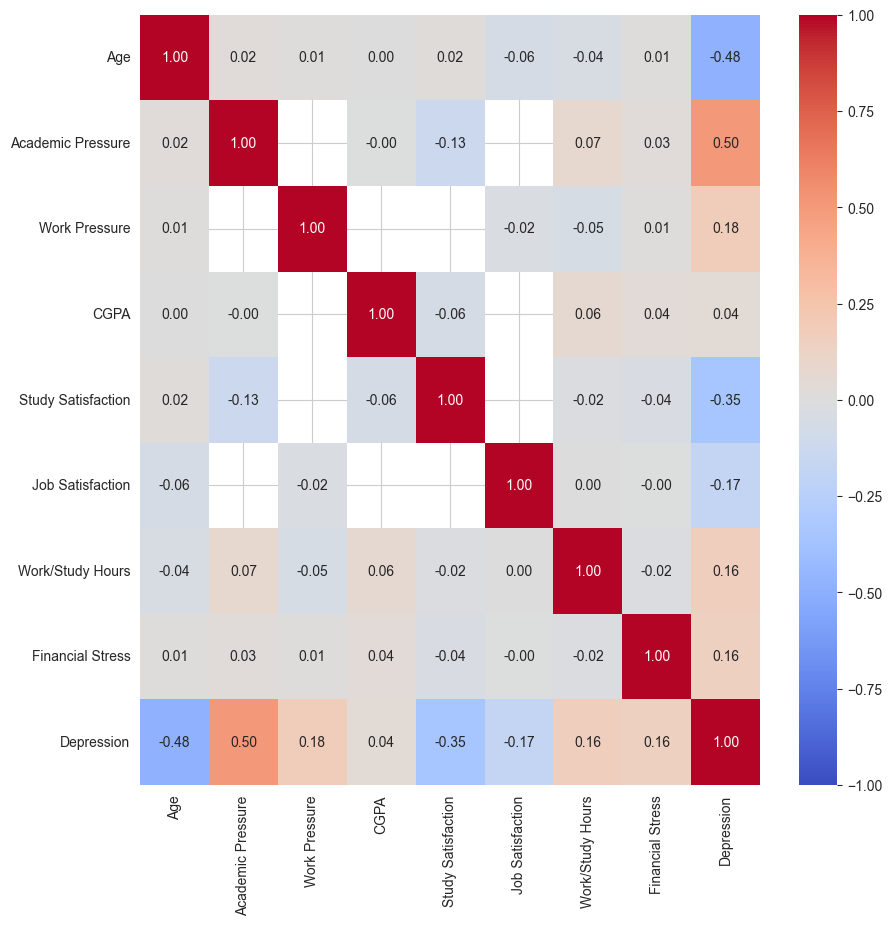

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(num_df.corr(), fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, annot=True)

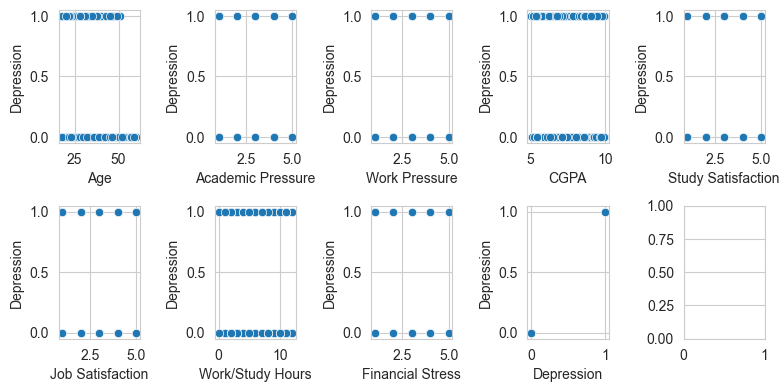

In [42]:
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y="Depression",
        data=num_df,
        ax=ax,
    )
fig.tight_layout(pad=1.0)

In [43]:
print((df.columns))

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')


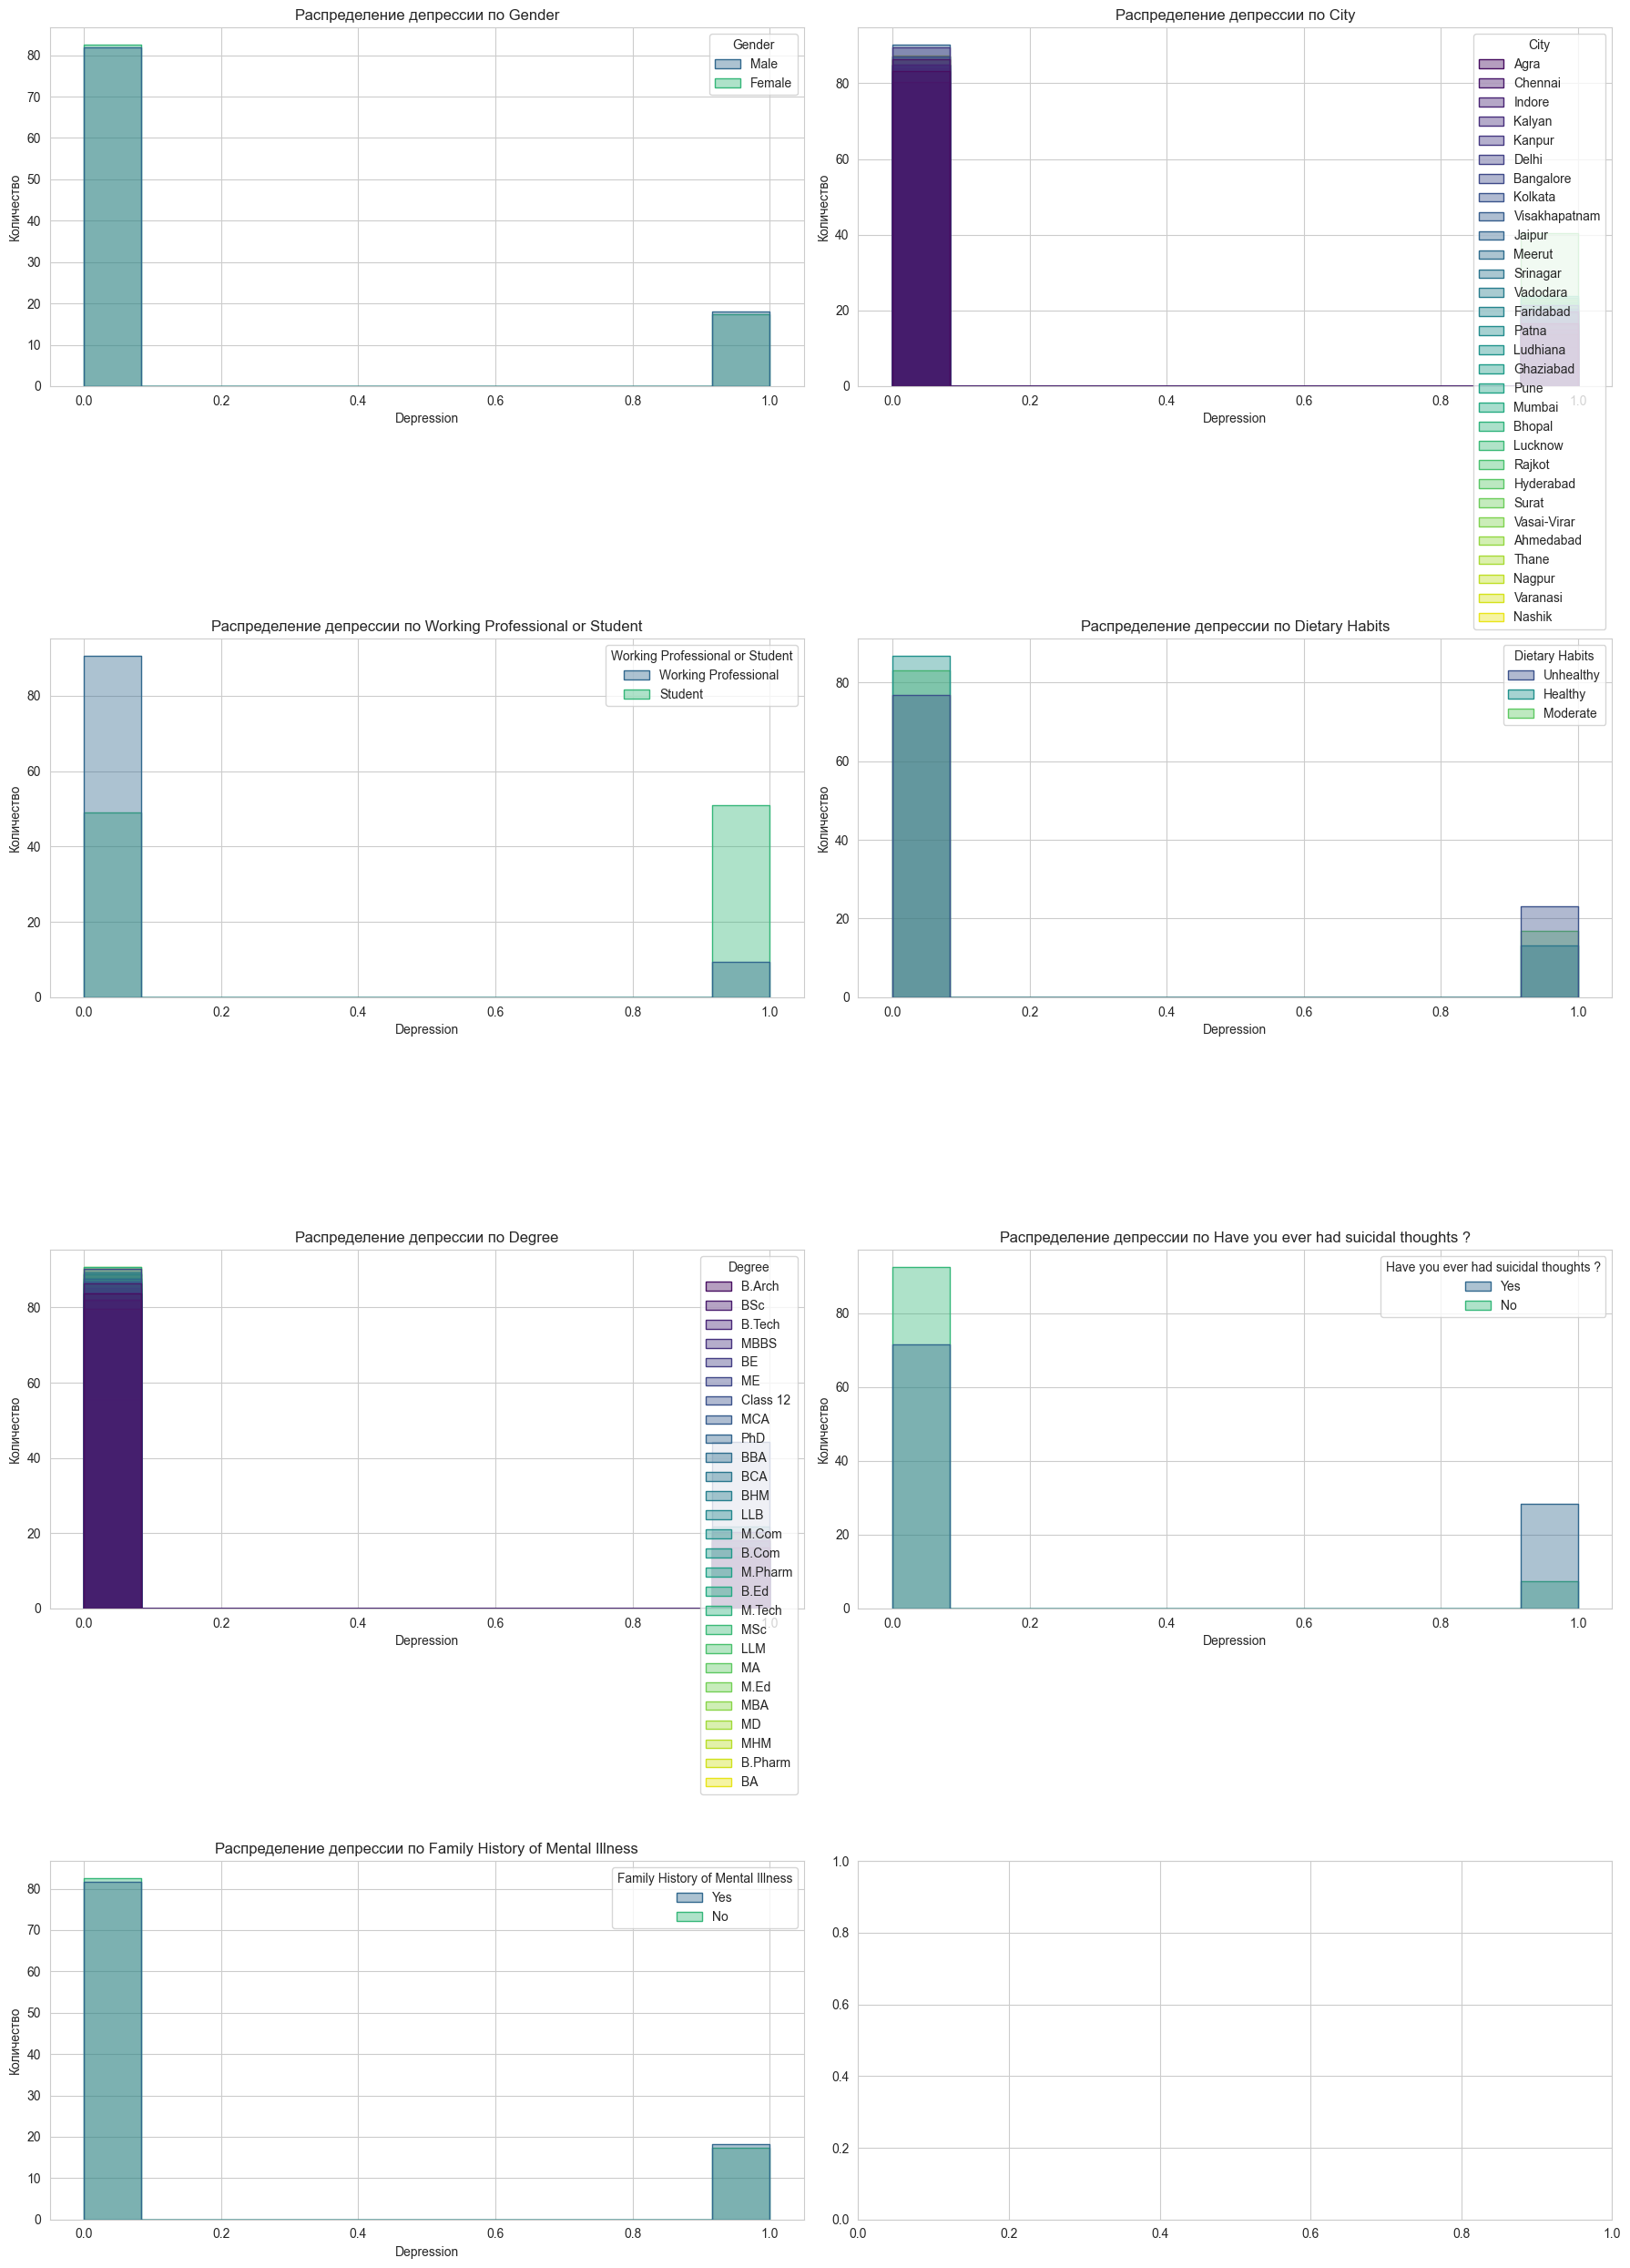

In [44]:
sns.set_style("whitegrid")

top_categorical = [
    'Gender', 
    'City',   
    'Working Professional or Student', 
    'Dietary Habits',  
    'Degree',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

# top_categorical = df.drop(columns=["Name", "City", "Profession", "Degree"]).select_dtypes(include=["object"])

fig, axes = plt.subplots(4, 2, figsize=(18, 25))
axes = axes.flatten()
for i, feature in enumerate(top_categorical):
    ax = sns.histplot(
        data=df,
        x='Depression',
        hue=feature,
        element='step',
        palette='viridis',
        stat='percent',
        common_norm=False,
        alpha=0.4,
        ax=axes[i],
    )
    ax.set_title(f'Распределение депрессии по {feature}', fontsize=12)
    ax.set_xlabel('Depression', fontsize=10)
    ax.set_ylabel('Количество', fontsize=10)
plt.tight_layout()

## Conclusion
This graph is really great for simle research of correleaton of differetn category from target

In [45]:
for col in cat_df.columns:
    print(cat_df[col].value_counts())
    print()

Name
Rohan      19
Krishna    17
Sanya      17
Chhavi     16
Gauri      16
           ..
Lakshay     3
Mukund      3
Rajveer     3
Rupa        2
Aakash      2
Name: count, Length: 216, dtype: int64

Gender
Male      1004
Female     887
Name: count, dtype: int64

City
Srinagar         83
Pune             80
Meerut           78
Mumbai           72
Visakhapatnam    70
Kanpur           67
Indore           66
Chennai          66
Vasai-Virar      65
Patna            65
Surat            63
Bhopal           63
Ludhiana         62
Hyderabad        62
Rajkot           62
Vadodara         62
Thane            61
Jaipur           61
Kolkata          61
Bangalore        60
Kalyan           60
Faridabad        59
Varanasi         58
Ahmedabad        58
Nagpur           56
Lucknow          56
Delhi            56
Nashik           55
Agra             54
Ghaziabad        50
Name: count, dtype: int64

Working Professional or Student
Working Professional    1509
Student                  382
Name: count, dt

In [46]:
df_with_missing.columns

Index(['Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction'],
      dtype='object')

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder

class MyPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, encode="label"):
        """
        encode may be label or target
        """
        self.encode = encode

        # self.col_for_drop = ["Family History of Mental Illness", "Profession", "City", "Name", "id"]
        self.col_for_drop = ["Profession", "id", "City", "Name"]
        # if encode == "label":
        #     self.col_for_drop = ["Profession", "id", "City", "Name"]
        # elif encode == "target":
        #     self.col_for_drop = ["Profession", "id", "Name"]
        # else:
        #     raise ValueError("Incorrect encoding")

        self.imput_data = ["Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction"]

        self.target_encode_cols = ["Family History of Mental Illness", "Have you ever had suicidal thoughts ?", "Dietary Habits",
                                   "Sleep Duration", "Working Professional or Student", "Gender"]

    def fit(self, X: pd.DataFrame, y=None):
        X = X.copy()
        self.my_maps = {
            "Family History of Mental Illness" : {"No": 0, "Yes": 1},
            "Have you ever had suicidal thoughts ?" : {"No": 0, "Yes": 1},
            "Dietary Habits": {"Unhealthy": 0, "Moderate": 1, "Healthy": 2},
            "Sleep Duration": {"Less than 5 hours": 0, "5-6 hours": 1, "7-8 hours": 2, "More than 8 hours": 3},
            "Working Professional or Student": {"Student": 0, "Working Professional": 1},
            "Gender": {"Female": 0, "Male": 1},
            # "City": X["City"].value_counts().to_dict()
        }

        self.target_encoder = TargetEncoder(cols=self.target_encode_cols)
        self.target_encoder.fit(X[self.target_encode_cols], y)

        return self
    
    def transform(self, X: pd.DataFrame):
        X = X.copy()
        X = X.reset_index(drop=True)

        X.drop(columns=self.col_for_drop, inplace=True, errors="ignore")

        for i in range(len(X)):
            if X.loc[i, "Degree"] == "Class 12":
                X.loc[i, "Degree"] = 0
            else:
                X.loc[i, "Degree"] = 1

        if self.encode == "label":
            for col in self.my_maps.keys():
                X[col] = X[col].map(self.my_maps[col])
        elif self.encode == "target":
            X_target_encoded = self.target_encoder.transform(X[self.target_encode_cols])
            X[X_target_encoded.columns] = X_target_encoded
        else:
            raise ValueError("Incorrect encoding")


        imputer = SimpleImputer(strategy="constant", fill_value=0)

        X[self.imput_data] = imputer.fit_transform(X[self.imput_data])

        return X

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X_train, y_train = train_df.drop(columns="Depression"), train_df["Depression"]
X_test = test_df

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

my_prep = MyPreprocessor()
my_prep.fit(X_train, y_train)
my_prep.transform(X_train)

pipe = Pipeline([
    ('preprocessing', MyPreprocessor()),
    ('model', DecisionTreeClassifier())
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
print("А1 score:", f1_score(y_test, y_pred))

А1 score: 0.7898089171974523


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X_train, y_train = train_df.drop(columns="Depression"), train_df["Depression"]
X_test = test_df

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

# my_prep = MyPreprocessor()
# my_prep.fit(X_train, y_train)
# my_prep.transform(X_train)

pipe = Pipeline([
    ('preprocessing', MyPreprocessor()),
    ('model', RandomForestClassifier())
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.8201438848920863


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X_train, y_train = train_df.drop(columns="Depression"), train_df["Depression"]
X_test = test_df

# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

# my_prep = MyPreprocessor()
# my_prep.fit(X_train, y_train)
# my_prep.transform(X_train)

pipe = Pipeline([
    ('preprocessing', MyPreprocessor()),
    ('scale', StandardScaler()),
    # ('polifeature', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression(max_iter=10000, penalty='elasticnet', solver='saga', l1_ratio=0.75, C=5))
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
# print("F1 score:", f1_score(y_test, y_pred))

## Conclusion
Tree models don't doo well, whilw LogicalRegression show great results \
PolynomialFeatures create too many features and model retrains or may be get confused because of noise (idk how it will be in ML cotext)

Also I tied to use target encoder and it lead to exteamly bad results.. my best model show only 0.9128 F1 score \
Лучшие параметры: {'clf__C': 9, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'} \
Лучший F1-Score: 0.9128211518742166

In [90]:
def save_submissoin(test_df, y_pred):
    submission = pd.DataFrame({
        "id": test_df["id"],
        "Depression": y_pred
    })

    submission.to_csv("submission.csv", index=False)

In [91]:
save_submissoin(test_df, y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X_train, y_train = train_df.drop(columns="Depression"), train_df["Depression"]
X_test = test_df

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

# Создаём пайплайн с масштабированием
pipe = Pipeline([
    ('preprocessing', MyPreprocessor()),
    ('clf', LogisticRegression(max_iter=1000000))
])

# Сетка параметров
param_grid = {
    'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'clf__C': [0.01, 0.1, 1, 2, 5, 7, 10],
    'clf__solver': ['saga'],  # saga поддерживает все виды регуляризации
    'clf__l1_ratio': [None, 0.25, 0.5, 0.75, 1.0],  # только для elasticnet
}

# GridSearch
grid = GridSearchCV(pipe, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Результаты
print("Лучшие параметры:", grid.best_params_)
print("F1-score:", grid.best_score_)


Лучшие параметры: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
F1-score: 0.9769151665322037


In [93]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Загрузка данных
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X_train, y_train = train_df.drop(columns="Depression"), train_df["Depression"]
X_test = test_df

# Создание пайплайна с вашим препроцессором и моделью LogisticRegression
pipe = Pipeline([
    ('preprocessing', MyPreprocessor(encode="target")),
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000000, solver='saga'))
])

# Параметры для перебора
param_grid = [
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
        'clf__solver': ['lbfgs', 'saga']
    },
    {
        'clf__penalty': ['l1'],
        'clf__C': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10],
        'clf__solver': ['saga']
    },
    {
        'clf__penalty': ['elasticnet'],
        'clf__C': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'clf__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.25, 0.75],
        'clf__solver': ['saga']
    },
]


# Применение GridSearchCV для перебора гиперпараметров
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Кросс-валидация с лучшими гиперпараметрами
grid_search.fit(X_train, y_train)

# Печать лучших параметров и F1-Score
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший F1-Score: {grid_search.best_score_}")

# Получаем кросс-валидационные оценки
scores = grid_search.cv_results_['mean_test_score']
print(f"F1-Score в кросс-валидации для каждого набора гиперпараметров: {scores}")


Лучшие параметры: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Лучший F1-Score: 0.9747019509558209
F1-Score в кросс-валидации для каждого набора гиперпараметров: [0.73261481 0.73261481 0.9027251  0.9027251  0.95576648 0.95736457
 0.96210756 0.96354297 0.96511508 0.96511508 0.96534398 0.96534398
 0.96534398 0.96534398 0.96534398 0.96689383 0.96841953 0.96844316
 0.96996886 0.96996886 0.96996886 0.96996886 0.97151751 0.97151751
 0.97304321 0.97304321 0.97160531 0.97014643 0.96862138 0.97014643
 0.96862138 0.97014643 0.96862138 0.97014643 0.96873096 0.97014643
 0.96873096 0.96720526 0.96873096 0.96873096 0.96873096 0.96873096
 0.48309886 0.92623031 0.94934947 0.95905463 0.96208406 0.9653224
 0.96832924 0.96987788 0.96987788 0.96998995 0.97470195 0.69906393
 0.65568381 0.64146355 0.62964625 0.60354013 0.57875553 0.5612839
 0.52302999 0.50338946 0.64467616 0.5411101  0.90617233 0.91254763
 0.90929328 0.91075936 0.91068281 0.90900453 0.90900711 0.91422085
 0.92112875 0.9107642